# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 20:28:42.372634: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T20:28:45.212413
2025-04-14 20:28:45.212413


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 3
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 453
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 20:28:40"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

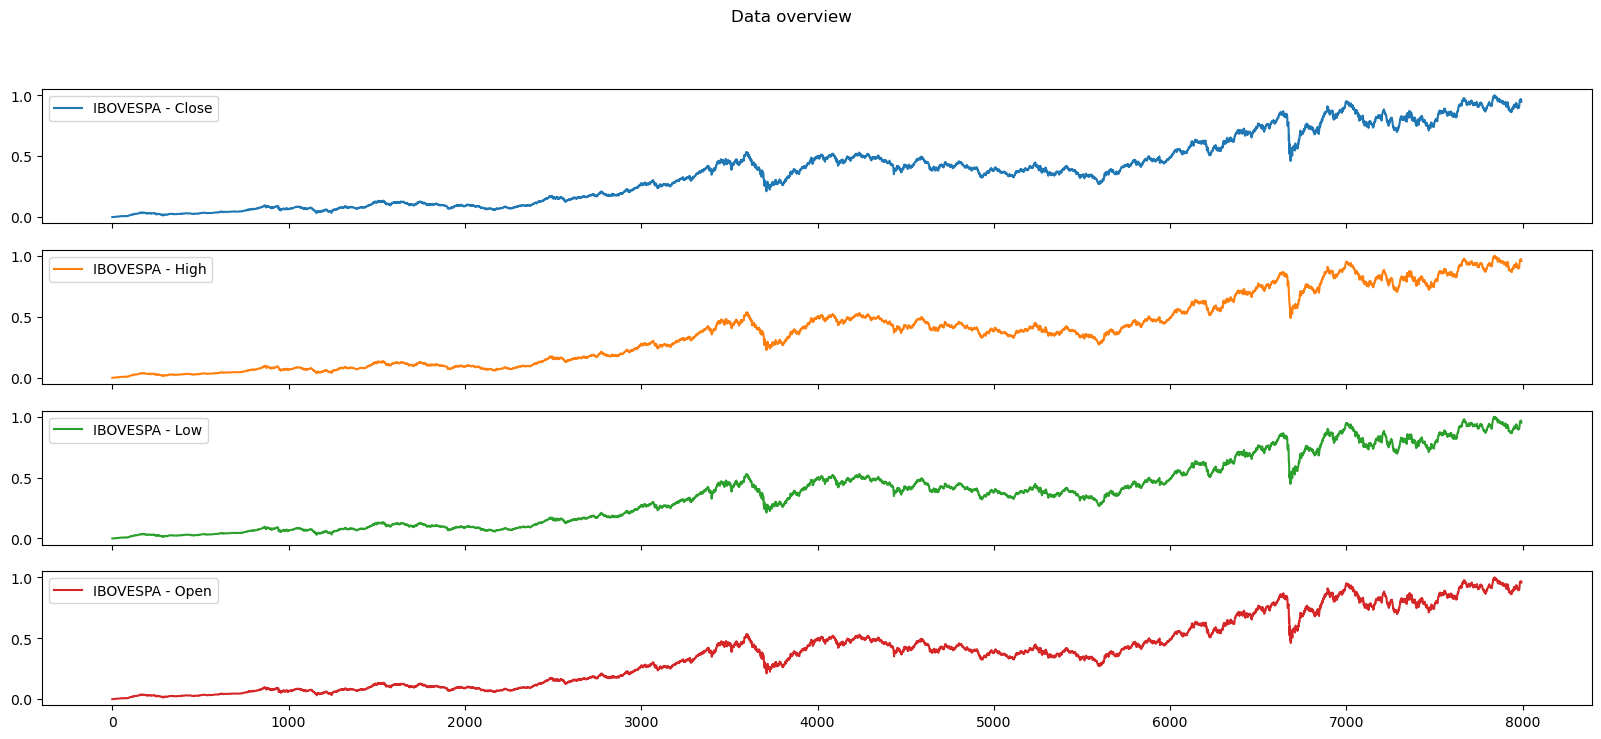

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

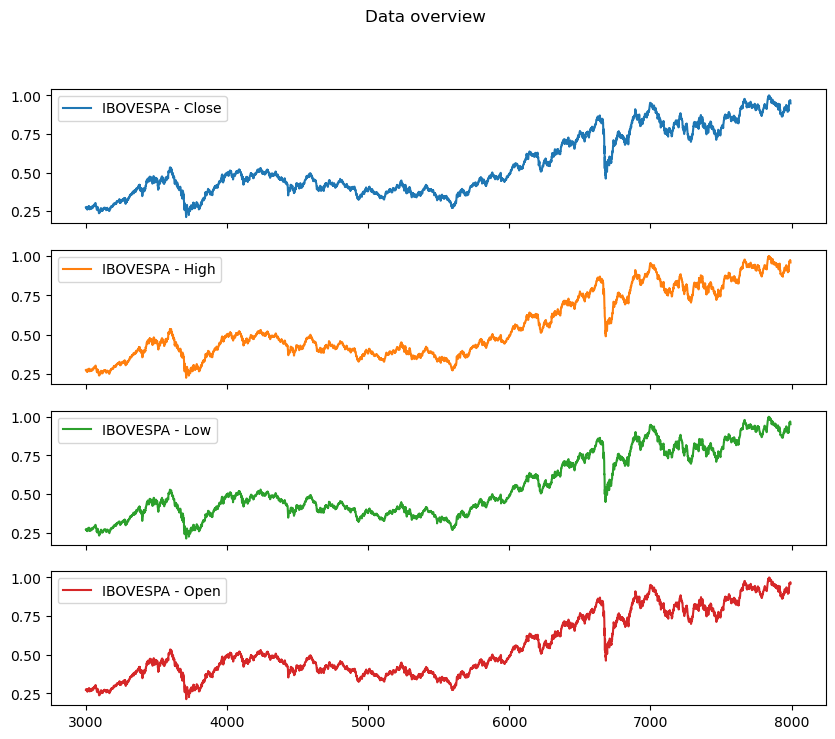

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

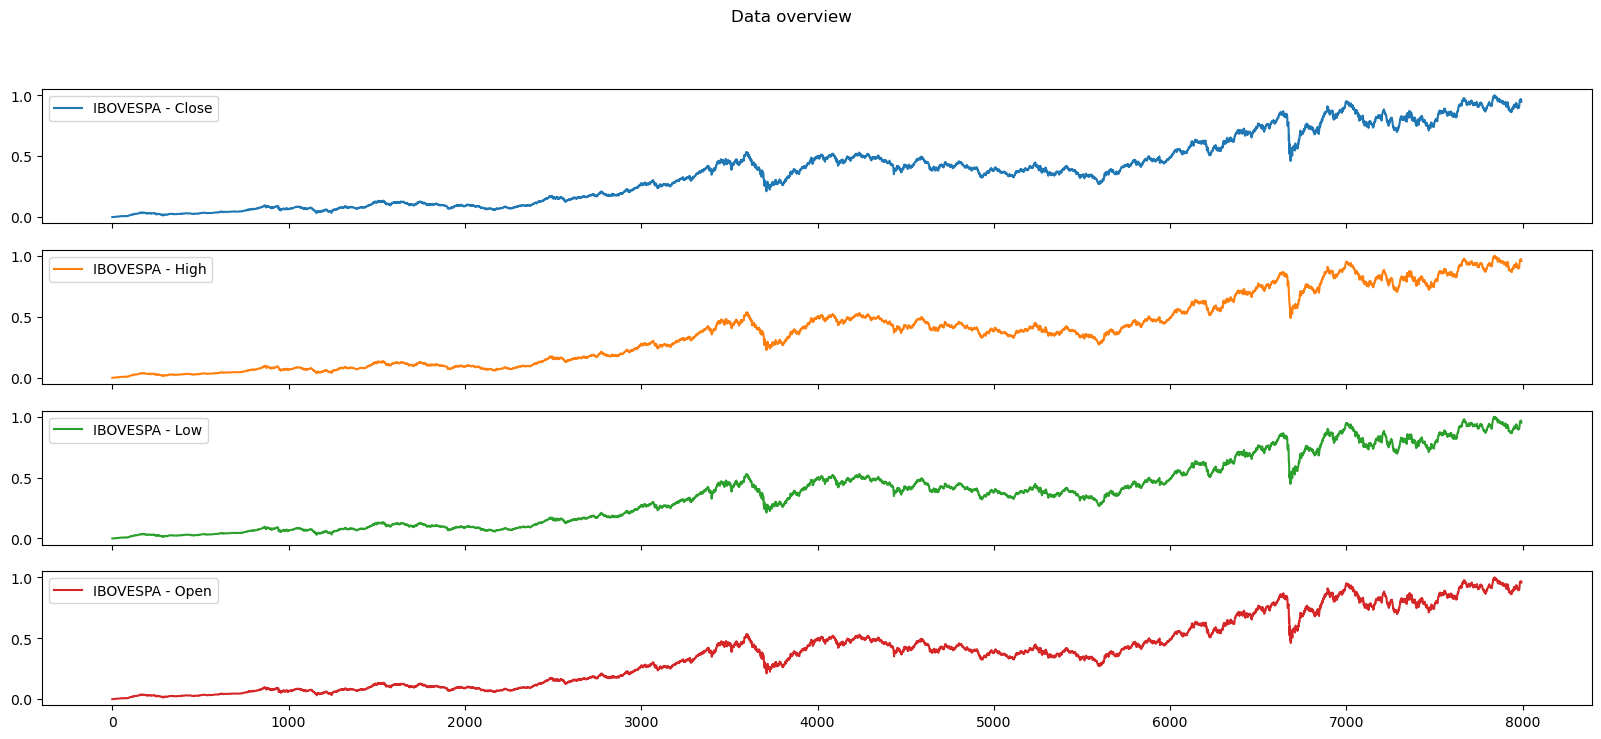

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

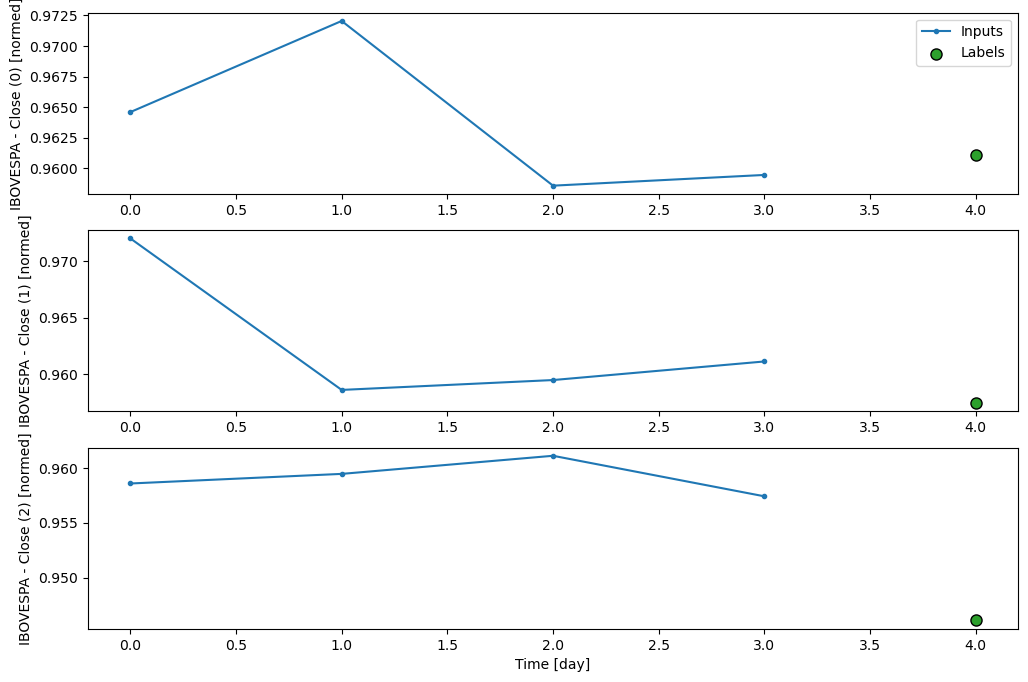

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

4

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8:29 2s/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0142e-05 - root_mean_squared_error: 0.0032

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 55.0982 - mean_squared_error: 5.8202e-05 - root_mean_squared_error: 0.0070  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 45.1618 - mean_squared_error: 7.0240e-05 - root_mean_squared_error: 0.0080

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 39.1433 - mean_squared_error: 6.8298e-05 - root_mean_squared_error: 0.0080

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 35.5009 - mean_squared_error: 7.7993e-05 - root_mean_squared_error: 0.0086

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 33.2163 - mean_squared_error: 9.0457e-05 - root_mean_squared_error: 0.0092

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 31.4752 - mean_squared_error: 1.0612e-04 - root_mean_squared_error: 0.0100

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 29.9820 - mean_squared_error: 1.1777e-04 - root_mean_squared_error: 0.0105

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 28.6486 - mean_squared_error: 1.2781e-04 - root_mean_squared_error: 0.0109

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 27.8190 - mean_squared_error: 1.5530e-04 - root_mean_squared_error: 0.0119

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 27.0053 - mean_squared_error: 1.8517e-04 - root_mean_squared_error: 0.0128

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 26.2888 - mean_squared_error: 2.0703e-04 - root_mean_squared_error: 0.0135

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 25.5580 - mean_squared_error: 2.3784e-04 - root_mean_squared_error: 0.0144

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 25.0458 - mean_squared_error: 3.2553e-04 - root_mean_squared_error: 0.0161

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 24.7441 - mean_squared_error: 4.4525e-04 - root_mean_squared_error: 0.0179

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 24.3959 - mean_squared_error: 6.1629e-04 - root_mean_squared_error: 0.0204

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 24.0395 - mean_squared_error: 7.5943e-04 - root_mean_squared_error: 0.0225

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 23.6416 - mean_squared_error: 8.9143e-04 - root_mean_squared_error: 0.0244

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 23.2851 - mean_squared_error: 9.8961e-04 - root_mean_squared_error: 0.0259

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 22.9018 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0273    

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 22.5930 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0286

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 22.3086 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0302

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 22.0771 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0317

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 21.8440 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0334

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 21.6557 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0351

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 21.4456 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0368

238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 21.3179 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0378 - val_loss: 0.0410 - val_mean_absolute_error: 0.0410 - val_mean_absolute_percentage_error: 4.3740 - val_mean_squared_error: 0.0022 - val_root_mean_squared_error: 0.0465 - lr: 0.0098


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.4011 - mean_absolute_error: 0.4011 - mean_absolute_percentage_error: 18813.2715 - mean_squared_error: 0.1609 - root_mean_squared_error: 0.4011

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3085 - mean_absolute_error: 0.3085 - mean_absolute_percentage_error: 7413.6289 - mean_squared_error: 0.1102 - root_mean_squared_error: 0.3281  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2734 - mean_absolute_error: 0.2734 - mean_absolute_percentage_error: 5118.8228 - mean_squared_error: 0.0912 - root_mean_squared_error: 0.2979

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2421 - mean_absolute_error: 0.2421 - mean_absolute_percentage_error: 3926.6130 - mean_squared_error: 0.0764 - root_mean_squared_error: 0.2709

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2186 - mean_absolute_error: 0.2186 - mean_absolute_percentage_error: 3282.1658 - mean_squared_error: 0.0667 - root_mean_squared_error: 0.2512

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1975 - mean_absolute_error: 0.1975 - mean_absolute_percentage_error: 2796.3218 - mean_squared_error: 0.0586 - root_mean_squared_error: 0.2335

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1819 - mean_absolute_error: 0.1819 - mean_absolute_percentage_error: 2478.1318 - mean_squared_error: 0.0529 - root_mean_squared_error: 0.2205

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1677 - mean_absolute_error: 0.1677 - mean_absolute_percentage_error: 2207.4827 - mean_squared_error: 0.0479 - root_mean_squared_error: 0.2084

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1568 - mean_absolute_error: 0.1568 - mean_absolute_percentage_error: 2014.5455 - mean_squared_error: 0.0442 - root_mean_squared_error: 0.1991

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1476 - mean_absolute_error: 0.1476 - mean_absolute_percentage_error: 1855.7717 - mean_squared_error: 0.0411 - root_mean_squared_error: 0.1909

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1404 - mean_absolute_error: 0.1404 - mean_absolute_percentage_error: 1736.2931 - mean_squared_error: 0.0388 - root_mean_squared_error: 0.1845

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1326 - mean_absolute_error: 0.1326 - mean_absolute_percentage_error: 1608.9891 - mean_squared_error: 0.0362 - root_mean_squared_error: 0.1774

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1266 - mean_absolute_error: 0.1266 - mean_absolute_percentage_error: 1510.9031 - mean_squared_error: 0.0342 - root_mean_squared_error: 0.1718

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1214 - mean_absolute_error: 0.1214 - mean_absolute_percentage_error: 1425.2502 - mean_squared_error: 0.0325 - root_mean_squared_error: 0.1667

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1171 - mean_absolute_error: 0.1171 - mean_absolute_percentage_error: 1349.7961 - mean_squared_error: 0.0310 - root_mean_squared_error: 0.1624

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1137 - mean_absolute_error: 0.1137 - mean_absolute_percentage_error: 1282.7842 - mean_squared_error: 0.0297 - root_mean_squared_error: 0.1588

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1107 - mean_absolute_error: 0.1107 - mean_absolute_percentage_error: 1222.7709 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1555

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1076 - mean_absolute_error: 0.1076 - mean_absolute_percentage_error: 1162.9755 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1521

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1050 - mean_absolute_error: 0.1050 - mean_absolute_percentage_error: 1114.4279 - mean_squared_error: 0.0265 - root_mean_squared_error: 0.1493

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1023 - mean_absolute_error: 0.1023 - mean_absolute_percentage_error: 1065.4874 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1463

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1006 - mean_absolute_error: 0.1006 - mean_absolute_percentage_error: 1033.9697 - mean_squared_error: 0.0249 - root_mean_squared_error: 0.1444

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0988 - mean_absolute_error: 0.0988 - mean_absolute_percentage_error: 1000.4005 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1423

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0969 - mean_absolute_error: 0.0969 - mean_absolute_percentage_error: 961.7059 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1400 

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0953 - mean_absolute_error: 0.0953 - mean_absolute_percentage_error: 929.6047 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1381

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0939 - mean_absolute_error: 0.0939 - mean_absolute_percentage_error: 899.7894 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1364

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0926 - mean_absolute_error: 0.0926 - mean_absolute_percentage_error: 872.0161 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1347

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 843.3044 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1330 - val_loss: 0.0534 - val_mean_absolute_error: 0.0534 - val_mean_absolute_percentage_error: 5.6798 - val_mean_squared_error: 0.0034 - val_root_mean_squared_error: 0.0580 - lr: 0.0095


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.5835 - mean_absolute_error: 0.5835 - mean_absolute_percentage_error: 27389.5977 - mean_squared_error: 0.3405 - root_mean_squared_error: 0.5835

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5741 - mean_absolute_error: 0.5741 - mean_absolute_percentage_error: 11327.4961 - mean_squared_error: 0.3297 - root_mean_squared_error: 0.5742 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5559 - mean_absolute_error: 0.5559 - mean_absolute_percentage_error: 7861.9951 - mean_squared_error: 0.3104 - root_mean_squared_error: 0.5567 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5329 - mean_absolute_error: 0.5329 - mean_absolute_percentage_error: 6630.3330 - mean_squared_error: 0.2902 - root_mean_squared_error: 0.5373

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5025 - mean_absolute_error: 0.5025 - mean_absolute_percentage_error: 5767.7637 - mean_squared_error: 0.2681 - root_mean_squared_error: 0.5147

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4729 - mean_absolute_error: 0.4729 - mean_absolute_percentage_error: 5126.2451 - mean_squared_error: 0.2481 - root_mean_squared_error: 0.4931

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4380 - mean_absolute_error: 0.4380 - mean_absolute_percentage_error: 4504.1812 - mean_squared_error: 0.2259 - root_mean_squared_error: 0.4679

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4072 - mean_absolute_error: 0.4072 - mean_absolute_percentage_error: 4030.4797 - mean_squared_error: 0.2074 - root_mean_squared_error: 0.4458

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3775 - mean_absolute_error: 0.3775 - mean_absolute_percentage_error: 3619.3555 - mean_squared_error: 0.1902 - root_mean_squared_error: 0.4245

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3521 - mean_absolute_error: 0.3521 - mean_absolute_percentage_error: 3292.1814 - mean_squared_error: 0.1759 - root_mean_squared_error: 0.4059

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3301 - mean_absolute_error: 0.3301 - mean_absolute_percentage_error: 3024.8000 - mean_squared_error: 0.1638 - root_mean_squared_error: 0.3896

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3128 - mean_absolute_error: 0.3128 - mean_absolute_percentage_error: 2822.3450 - mean_squared_error: 0.1543 - root_mean_squared_error: 0.3765

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2958 - mean_absolute_error: 0.2958 - mean_absolute_percentage_error: 2630.0437 - mean_squared_error: 0.1452 - root_mean_squared_error: 0.3634

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2824 - mean_absolute_error: 0.2824 - mean_absolute_percentage_error: 2480.2776 - mean_squared_error: 0.1379 - root_mean_squared_error: 0.3528

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2691 - mean_absolute_error: 0.2691 - mean_absolute_percentage_error: 2334.6558 - mean_squared_error: 0.1308 - root_mean_squared_error: 0.3421

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2584 - mean_absolute_error: 0.2584 - mean_absolute_percentage_error: 2218.9175 - mean_squared_error: 0.1250 - root_mean_squared_error: 0.3333

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2486 - mean_absolute_error: 0.2486 - mean_absolute_percentage_error: 2115.2332 - mean_squared_error: 0.1198 - root_mean_squared_error: 0.3252

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2396 - mean_absolute_error: 0.2396 - mean_absolute_percentage_error: 2021.7545 - mean_squared_error: 0.1150 - root_mean_squared_error: 0.3176

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2305 - mean_absolute_error: 0.2305 - mean_absolute_percentage_error: 1928.0587 - mean_squared_error: 0.1102 - root_mean_squared_error: 0.3099

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2230 - mean_absolute_error: 0.2230 - mean_absolute_percentage_error: 1851.5800 - mean_squared_error: 0.1063 - root_mean_squared_error: 0.3034

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2153 - mean_absolute_error: 0.2153 - mean_absolute_percentage_error: 1774.1044 - mean_squared_error: 0.1022 - root_mean_squared_error: 0.2966

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2089 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 1710.2533 - mean_squared_error: 0.0989 - root_mean_squared_error: 0.2909

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2023 - mean_absolute_error: 0.2023 - mean_absolute_percentage_error: 1645.0094 - mean_squared_error: 0.0954 - root_mean_squared_error: 0.2850

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1962 - mean_absolute_error: 0.1962 - mean_absolute_percentage_error: 1585.0402 - mean_squared_error: 0.0923 - root_mean_squared_error: 0.2794

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1912 - mean_absolute_error: 0.1912 - mean_absolute_percentage_error: 1535.0543 - mean_squared_error: 0.0896 - root_mean_squared_error: 0.2747

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1860 - mean_absolute_error: 0.1860 - mean_absolute_percentage_error: 1483.4489 - mean_squared_error: 0.0868 - root_mean_squared_error: 0.2698

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1822 - mean_absolute_error: 0.1822 - mean_absolute_percentage_error: 1444.8544 - mean_squared_error: 0.0848 - root_mean_squared_error: 0.2661 - val_loss: 0.0185 - val_mean_absolute_error: 0.0185 - val_mean_absolute_percentage_error: 2.0287 - val_mean_squared_error: 6.2157e-04 - val_root_mean_squared_error: 0.0249 - lr: 0.0093


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1567 - mean_absolute_error: 0.1567 - mean_absolute_percentage_error: 7370.7041 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1567

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1229 - mean_absolute_error: 0.1229 - mean_absolute_percentage_error: 2757.0037 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1280 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1000 - mean_absolute_error: 0.1000 - mean_absolute_percentage_error: 1906.7366 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1091

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 1458.7200 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0961

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 1239.3126 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0886

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 1082.7971 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0827

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 952.0678 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0774 

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 852.1874 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0730

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 773.1313 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0693

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 708.8190 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0661

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 655.3932 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0634

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 610.2663 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0612

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 571.6105 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0594

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 538.0533 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0580

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 508.6243 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0567

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 482.5811 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0557

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 456.9047 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0547

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 436.2444 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0538

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 415.5753 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0529

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 398.7344 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0521

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 381.7020 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0513

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 367.6859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0505

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 353.3839 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0498

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 341.5210 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0491

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 330.5099 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0486

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 320.2579 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0481

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 310.6864 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0477 - val_loss: 0.0433 - val_mean_absolute_error: 0.0433 - val_mean_absolute_percentage_error: 4.6251 - val_mean_squared_error: 0.0021 - val_root_mean_squared_error: 0.0461 - lr: 0.0090


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1584 - mean_absolute_error: 0.1584 - mean_absolute_percentage_error: 7450.5869 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1584

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1284 - mean_absolute_error: 0.1284 - mean_absolute_percentage_error: 2947.6736 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1323 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1050 - mean_absolute_error: 0.1050 - mean_absolute_percentage_error: 1997.4393 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1130

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0916 - mean_absolute_error: 0.0916 - mean_absolute_percentage_error: 1554.9581 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1014

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 1286.7834 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0928

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 1105.3024 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0862

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 973.3973 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0809 

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 862.7786 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0762

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 784.8145 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0727

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 714.8451 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0694

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 662.7900 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0668

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 613.9901 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0642

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 576.4019 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0622

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 540.2053 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0602

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 511.6904 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0586

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 483.6739 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0570

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 463.5900 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0558

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 443.0885 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0546

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 426.4749 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0536

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 409.3542 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0525

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 393.6851 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0515

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 379.2845 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0506

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 364.5882 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0496

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 352.3948 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0488

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 339.8630 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0480

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 329.4016 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0474

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 320.6851 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0469 - val_loss: 0.0396 - val_mean_absolute_error: 0.0396 - val_mean_absolute_percentage_error: 4.2151 - val_mean_squared_error: 0.0019 - val_root_mean_squared_error: 0.0435 - lr: 0.0088


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1680 - mean_absolute_error: 0.1680 - mean_absolute_percentage_error: 7905.0269 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1680

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1400 - mean_absolute_error: 0.1400 - mean_absolute_percentage_error: 3145.2576 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1430 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1106 - mean_absolute_error: 0.1106 - mean_absolute_percentage_error: 2059.7913 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1196

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0933 - mean_absolute_error: 0.0933 - mean_absolute_percentage_error: 1575.9161 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1053

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 1314.5372 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0962

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 1118.0959 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0885

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 989.8992 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0831 

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 881.0399 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0782

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 803.6214 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0745

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 733.6454 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0710

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 681.3035 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0683

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 636.6099 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0659

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 597.9532 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0637

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 560.6844 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0617

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 531.2885 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0600

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 505.1109 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0585

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 481.6332 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0572

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 458.2139 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0558

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 439.1812 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0546

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 419.9759 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0534

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 404.2048 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0524

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 389.6862 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0514

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 376.2727 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0506

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 362.5171 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0497

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 349.8333 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0491

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 339.2265 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0485

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 335.8488 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0483 - val_loss: 0.0339 - val_mean_absolute_error: 0.0339 - val_mean_absolute_percentage_error: 3.6160 - val_mean_squared_error: 0.0014 - val_root_mean_squared_error: 0.0372 - lr: 0.0086


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1664 - mean_absolute_error: 0.1664 - mean_absolute_percentage_error: 7825.8794 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1664

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1388 - mean_absolute_error: 0.1388 - mean_absolute_percentage_error: 3114.4492 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1417 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1148 - mean_absolute_error: 0.1148 - mean_absolute_percentage_error: 2184.1770 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1227

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1031 - mean_absolute_error: 0.1031 - mean_absolute_percentage_error: 1772.2404 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1124

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 1443.2213 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1022

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 1227.0081 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0945

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 1058.1517 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0878

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 945.0724 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0829 

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 847.2950 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0784

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 776.8227 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0749

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 718.3392 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0720

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 668.8779 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0694

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 626.4237 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0670

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 589.5432 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0650

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 553.8418 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0630

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 525.5677 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0613

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 497.6704 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0597

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 475.2172 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0583

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 454.8919 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0570

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 436.3963 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0559

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 417.6967 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0546

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 402.3139 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0536

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 386.6234 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0526

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 373.6115 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0517

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 360.2451 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0508

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 347.8975 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0501

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 338.6741 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0495 - val_loss: 0.0352 - val_mean_absolute_error: 0.0352 - val_mean_absolute_percentage_error: 3.7448 - val_mean_squared_error: 0.0015 - val_root_mean_squared_error: 0.0386 - lr: 0.0084


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1786 - mean_absolute_error: 0.1786 - mean_absolute_percentage_error: 8400.8271 - mean_squared_error: 0.0319 - root_mean_squared_error: 0.1786

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1519 - mean_absolute_error: 0.1519 - mean_absolute_percentage_error: 3356.5164 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1543 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1233 - mean_absolute_error: 0.1233 - mean_absolute_percentage_error: 2278.0508 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1318

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1047 - mean_absolute_error: 0.1047 - mean_absolute_percentage_error: 1729.9105 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1163

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0925 - mean_absolute_error: 0.0925 - mean_absolute_percentage_error: 1437.9291 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1062

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0823 - mean_absolute_error: 0.0823 - mean_absolute_percentage_error: 1219.9574 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0977

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 1078.3563 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0917

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 958.5254 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0863 

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 873.5829 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0822

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 797.0331 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0784

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 739.8645 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0754

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 691.1112 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0728

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 648.9793 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0704

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 612.1789 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0683

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 576.3508 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0662

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 550.8569 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0647

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 530.5110 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0635

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 506.6675 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0620

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 485.0742 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0606

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 465.4164 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0593

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 449.3596 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0583

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 438.0952 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0575

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 429.1730 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0569

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 415.7018 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0560

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 400.1170 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0549

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 387.1539 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0540

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 375.0882 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0533

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 362.6221 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0525 - val_loss: 0.0360 - val_mean_absolute_error: 0.0360 - val_mean_absolute_percentage_error: 3.8371 - val_mean_squared_error: 0.0015 - val_root_mean_squared_error: 0.0391 - lr: 0.0082


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1673 - mean_absolute_error: 0.1673 - mean_absolute_percentage_error: 7871.1641 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1673

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1450 - mean_absolute_error: 0.1450 - mean_absolute_percentage_error: 3332.4246 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1468 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1145 - mean_absolute_error: 0.1145 - mean_absolute_percentage_error: 2129.7925 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1226

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0979 - mean_absolute_error: 0.0979 - mean_absolute_percentage_error: 1653.3217 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1090

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0844 - mean_absolute_error: 0.0844 - mean_absolute_percentage_error: 1340.6501 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0982

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 1153.8470 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0909

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 1017.2925 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0852

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 912.5499 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0805 

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 821.2585 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0762

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 754.9805 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0729

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 694.0370 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0698

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 647.8085 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0673

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 607.9245 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0651

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 569.5469 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0630

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 539.3392 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0613

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 509.6713 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0597

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 483.3983 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0582

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 459.9488 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0568

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 440.8881 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0556

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 423.4916 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0545

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 407.5439 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0535

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 392.8661 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0525

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 377.8654 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0515

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 364.0784 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0507

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 352.5897 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0500

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 340.7274 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0493

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 337.3405 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0491 - val_loss: 0.0300 - val_mean_absolute_error: 0.0300 - val_mean_absolute_percentage_error: 3.1945 - val_mean_squared_error: 0.0011 - val_root_mean_squared_error: 0.0328 - lr: 0.0080


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1778 - mean_absolute_error: 0.1778 - mean_absolute_percentage_error: 8363.5977 - mean_squared_error: 0.0316 - root_mean_squared_error: 0.1778

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1527 - mean_absolute_error: 0.1527 - mean_absolute_percentage_error: 3348.7122 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1548 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1250 - mean_absolute_error: 0.1250 - mean_absolute_percentage_error: 2277.8401 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1328

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1116 - mean_absolute_error: 0.1116 - mean_absolute_percentage_error: 1862.4081 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1215

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1037 - mean_absolute_error: 0.1037 - mean_absolute_percentage_error: 1656.3799 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1150

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0946 - mean_absolute_error: 0.0946 - mean_absolute_percentage_error: 1441.2073 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1075

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0891 - mean_absolute_error: 0.0891 - mean_absolute_percentage_error: 1322.2444 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1030

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 1188.4213 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0976

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 1081.8245 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0930

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 1029.9843 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0907

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 972.5020 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0880 

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 921.8012 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0856

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 894.1440 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0842

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 868.2932 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0829

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 836.3237 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0813

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 806.9073 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0798

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 760.6309 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0774

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 714.4781 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0749

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 678.9056 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0729

111/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 660.2865 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0719

117/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 634.3901 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0704

123/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 610.6555 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0690

130/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 585.3359 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0675

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 562.2356 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0661

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 541.0681 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0648 

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 526.9966 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0639

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 508.6021 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0628

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 491.5723 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0617

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 475.7555 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0606

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 461.0224 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0597

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 447.2622 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0587

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 437.9748 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0581

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 425.6645 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0572

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 412.4965 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0563

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 403.1942 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0557

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 392.9101 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0550

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 383.1895 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0543

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 372.7115 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0536

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 364.0504 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0530 - val_loss: 0.0397 - val_mean_absolute_error: 0.0397 - val_mean_absolute_percentage_error: 4.2317 - val_mean_squared_error: 0.0019 - val_root_mean_squared_error: 0.0434 - lr: 0.0078


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.1713 - mean_absolute_error: 0.1713 - mean_absolute_percentage_error: 8059.4668 - mean_squared_error: 0.0293 - root_mean_squared_error: 0.1713

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1502 - mean_absolute_error: 0.1502 - mean_absolute_percentage_error: 3420.3257 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1517  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1276 - mean_absolute_error: 0.1276 - mean_absolute_percentage_error: 2442.1316 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1337

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1123 - mean_absolute_error: 0.1123 - mean_absolute_percentage_error: 1942.8339 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1211

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1008 - mean_absolute_error: 0.1008 - mean_absolute_percentage_error: 1630.1415 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1116

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0904 - mean_absolute_error: 0.0904 - mean_absolute_percentage_error: 1386.9883 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1032

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 1232.2737 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0972

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0767 - mean_absolute_error: 0.0767 - mean_absolute_percentage_error: 1096.8433 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0916

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 1003.0607 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0875

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 925.6437 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0840 

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 878.1108 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0817

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 812.5748 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0786

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 763.6127 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0761

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 715.1074 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0736

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 677.9445 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0716

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 644.8268 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0698

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 611.1119 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0679

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 588.2900 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0666

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 570.6676 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0656

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 547.8738 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0642

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 524.1683 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0628

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 502.6246 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0615

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 482.9486 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0602

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 467.0743 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0592

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 452.3100 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0582

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 438.5401 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0573

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 423.8914 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0563

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 411.9294 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0555

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 399.1369 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0546

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 387.1903 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0538

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 382.9121 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0535

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 373.3250 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0528

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 364.2545 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0522

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 356.8587 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0517

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 350.9469 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0514 - val_loss: 0.0415 - val_mean_absolute_error: 0.0415 - val_mean_absolute_percentage_error: 4.4668 - val_mean_squared_error: 0.0019 - val_root_mean_squared_error: 0.0431 - lr: 0.0076


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - loss: 0.1513 - mean_absolute_error: 0.1513 - mean_absolute_percentage_error: 7122.4707 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1513

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1266 - mean_absolute_error: 0.1266 - mean_absolute_percentage_error: 2834.1667 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1289  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1021 - mean_absolute_error: 0.1021 - mean_absolute_percentage_error: 1919.8962 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1096

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0874 - mean_absolute_error: 0.0874 - mean_absolute_percentage_error: 1490.2302 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0974

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 1208.3755 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0877

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 1040.1819 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0813

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 917.3612 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0763 

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 823.1514 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0722

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 741.0298 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0683

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 681.4647 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0656

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 631.6780 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0631

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 589.3623 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0610

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 549.1500 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0588

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 517.8502 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0572

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 487.4439 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0558

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 463.2851 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0546

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 443.9469 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0537

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 428.4363 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0530

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 414.0803 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0523

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 402.5964 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0517

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 388.3383 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0509

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 376.7471 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0503

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 364.4009 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0496

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 354.3094 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0491

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 346.1388 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0486

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 342.2073 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0484

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 334.6348 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0480

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 325.0988 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0475

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 317.2365 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0471

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 309.7841 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0467

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 305.6987 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0465 - val_loss: 0.0189 - val_mean_absolute_error: 0.0189 - val_mean_absolute_percentage_error: 2.0195 - val_mean_squared_error: 5.1719e-04 - val_root_mean_squared_error: 0.0227 - lr: 0.0074


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.1999 - mean_absolute_error: 0.1999 - mean_absolute_percentage_error: 9401.2607 - mean_squared_error: 0.0400 - root_mean_squared_error: 0.1999

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1831 - mean_absolute_error: 0.1831 - mean_absolute_percentage_error: 4274.9214 - mean_squared_error: 0.0340 - root_mean_squared_error: 0.1839 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1576 - mean_absolute_error: 0.1576 - mean_absolute_percentage_error: 2887.4988 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1628

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1390 - mean_absolute_error: 0.1390 - mean_absolute_percentage_error: 2301.8564 - mean_squared_error: 0.0228 - root_mean_squared_error: 0.1480

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1238 - mean_absolute_error: 0.1238 - mean_absolute_percentage_error: 1893.3608 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1356

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1137 - mean_absolute_error: 0.1137 - mean_absolute_percentage_error: 1649.8390 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1271

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1076 - mean_absolute_error: 0.1076 - mean_absolute_percentage_error: 1515.2191 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1219

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1036 - mean_absolute_error: 0.1036 - mean_absolute_percentage_error: 1424.3981 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1184

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0974 - mean_absolute_error: 0.0974 - mean_absolute_percentage_error: 1291.9436 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1129

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0929 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 1198.6635 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1088

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0883 - mean_absolute_error: 0.0883 - mean_absolute_percentage_error: 1107.3318 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1046

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0847 - mean_absolute_error: 0.0847 - mean_absolute_percentage_error: 1040.6135 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1014

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 973.3160 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0980 

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 892.4601 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0938

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 831.4629 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0904

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 779.0579 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0874

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 733.4906 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0847

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 689.3171 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0820

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 654.3002 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0798

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 619.7269 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0776

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 591.8842 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0757

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 564.0134 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0738

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 541.2919 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0723

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 518.3000 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0706

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 499.3703 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0692

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 480.0461 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0678

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 464.0102 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0666

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 449.1154 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0655

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 435.2415 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0645

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 422.2841 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0636 - val_loss: 0.0300 - val_mean_absolute_error: 0.0300 - val_mean_absolute_percentage_error: 3.1993 - val_mean_squared_error: 0.0011 - val_root_mean_squared_error: 0.0330 - lr: 0.0072


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:23s:796ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']


MAE: 0.006142390426248312 - MSE: 6.263914110604674e-05 - MAPE: 0.7226079702377319 - RMSE: 0.007914489135146141


2025-04-14 20:29:13.770397: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 3,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 20:28:40',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 453,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - High',
  'IBOVESPA - Low',
  'IBOVESPA - Open'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:0m:23s:796ms',
 'TRAINING_EPOCHS': 13,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006142390426248312,
   'MSE': 6.263914110604674e-05,
   'MAPE': 0.7226079702377319,
   'RMSE': 0.007914489135146141}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

2025-04-14 20:29:13.966346: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.1623 - mean_absolute_error: 0.1623 - mean_absolute_percentage_error: 7639.5137 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1623

 15/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1513 - mean_absolute_error: 0.1513 - mean_absolute_percentage_error: 2526.1226 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1515 

 30/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1460 - mean_absolute_error: 0.1460 - mean_absolute_percentage_error: 1724.6718 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1464

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1422 - mean_absolute_error: 0.1422 - mean_absolute_percentage_error: 1455.9058 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1427

 49/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1392 - mean_absolute_error: 0.1392 - mean_absolute_percentage_error: 1288.7948 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1399

 57/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1363 - mean_absolute_error: 0.1363 - mean_absolute_percentage_error: 1174.0645 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1373

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1337 - mean_absolute_error: 0.1337 - mean_absolute_percentage_error: 1081.4656 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1349

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1318 - mean_absolute_error: 0.1318 - mean_absolute_percentage_error: 1014.2250 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1331

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1295 - mean_absolute_error: 0.1295 - mean_absolute_percentage_error: 941.4790 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1309 

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1268 - mean_absolute_error: 0.1268 - mean_absolute_percentage_error: 873.6411 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1285

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1241 - mean_absolute_error: 0.1241 - mean_absolute_percentage_error: 816.1118 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1261

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1216 - mean_absolute_error: 0.1216 - mean_absolute_percentage_error: 771.2173 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1240

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1191 - mean_absolute_error: 0.1191 - mean_absolute_percentage_error: 731.5819 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1219

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1162 - mean_absolute_error: 0.1162 - mean_absolute_percentage_error: 688.9910 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1195

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1141 - mean_absolute_error: 0.1141 - mean_absolute_percentage_error: 661.3661 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1178

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1119 - mean_absolute_error: 0.1119 - mean_absolute_percentage_error: 633.1379 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1160

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1095 - mean_absolute_error: 0.1095 - mean_absolute_percentage_error: 604.8104 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1141

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1078 - mean_absolute_error: 0.1078 - mean_absolute_percentage_error: 584.1394 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1126

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1055 - mean_absolute_error: 0.1055 - mean_absolute_percentage_error: 558.2050 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1107

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1032 - mean_absolute_error: 0.1032 - mean_absolute_percentage_error: 532.7353 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1088

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1014 - mean_absolute_error: 0.1014 - mean_absolute_percentage_error: 513.4244 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1072

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0992 - mean_absolute_error: 0.0992 - mean_absolute_percentage_error: 492.2231 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1054

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0972 - mean_absolute_error: 0.0972 - mean_absolute_percentage_error: 472.8927 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1037

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0950 - mean_absolute_error: 0.0950 - mean_absolute_percentage_error: 453.7779 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1020

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0944 - mean_absolute_error: 0.0944 - mean_absolute_percentage_error: 448.2433 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1015


Loss: 0.05679277330636978 - MAE: 0.05679277330636978 - MSE: 0.005015505012124777 - MAPE: 122.83492279052734 - RMSE: 0.07082022726535797


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 2.0228 - mean_squared_error: 4.6825e-04 - root_mean_squared_error: 0.0216

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 2.9616 - mean_squared_error: 9.3734e-04 - root_mean_squared_error: 0.0304 


Loss: 0.030011070892214775 - MAE: 0.030011070892214775 - MSE: 0.0010895872255787253 - MAPE: 3.1992857456207275 - RMSE: 0.03300889581441879


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 3.4581 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0335

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 2.9149 - mean_squared_error: 8.9670e-04 - root_mean_squared_error: 0.0299


Loss: 0.026365965604782104 - MAE: 0.026365965604782104 - MSE: 0.0008804103708826005 - MAPE: 2.832822322845459 - RMSE: 0.02967170998454094


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

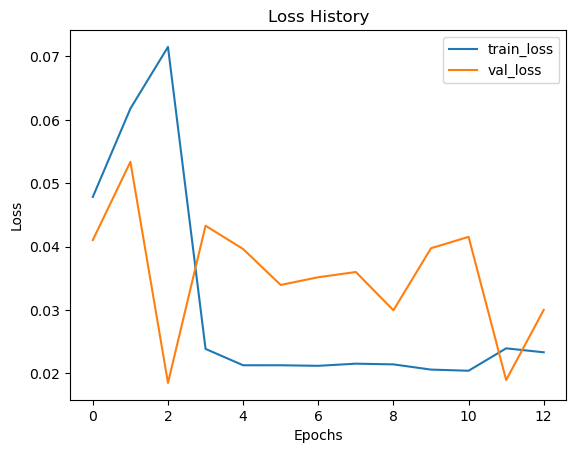

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

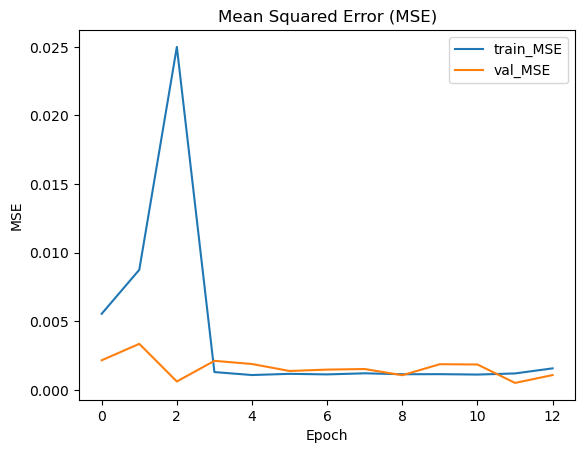

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

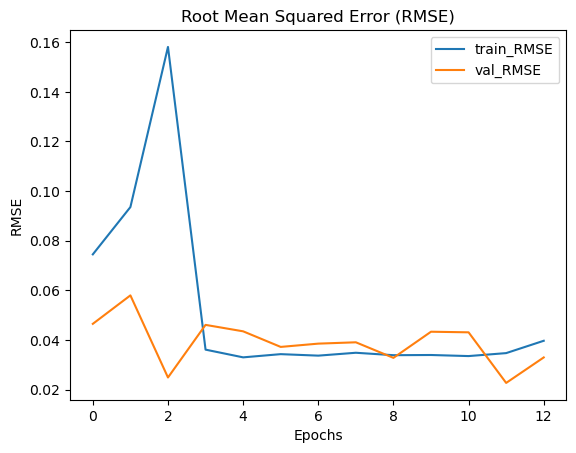

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

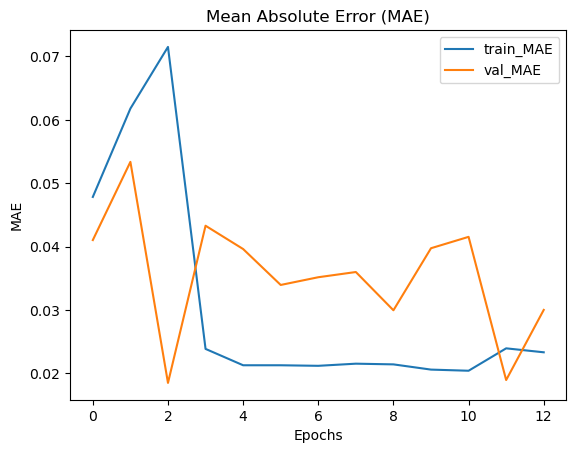

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

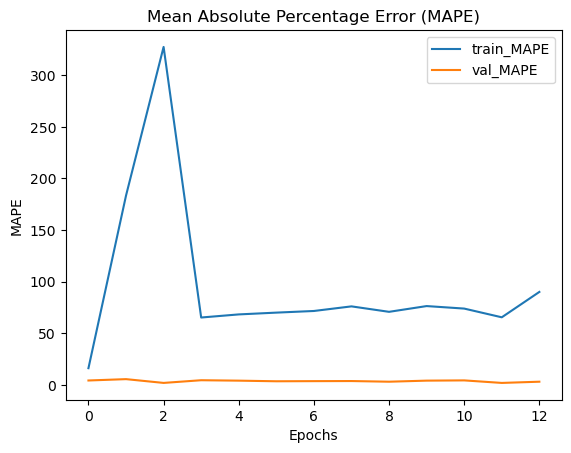

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 20:29:18.107568: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7599, 4, 4)
Labels Shape: (7599, 1, 1)
Prediction Shape: (7599, 1, 10)


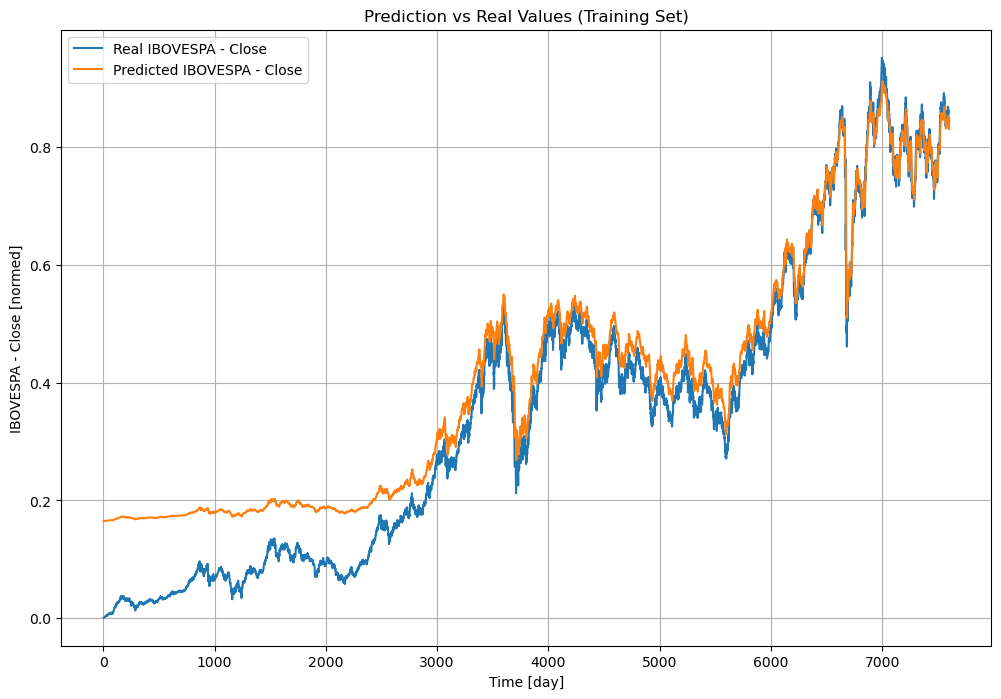

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 4)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


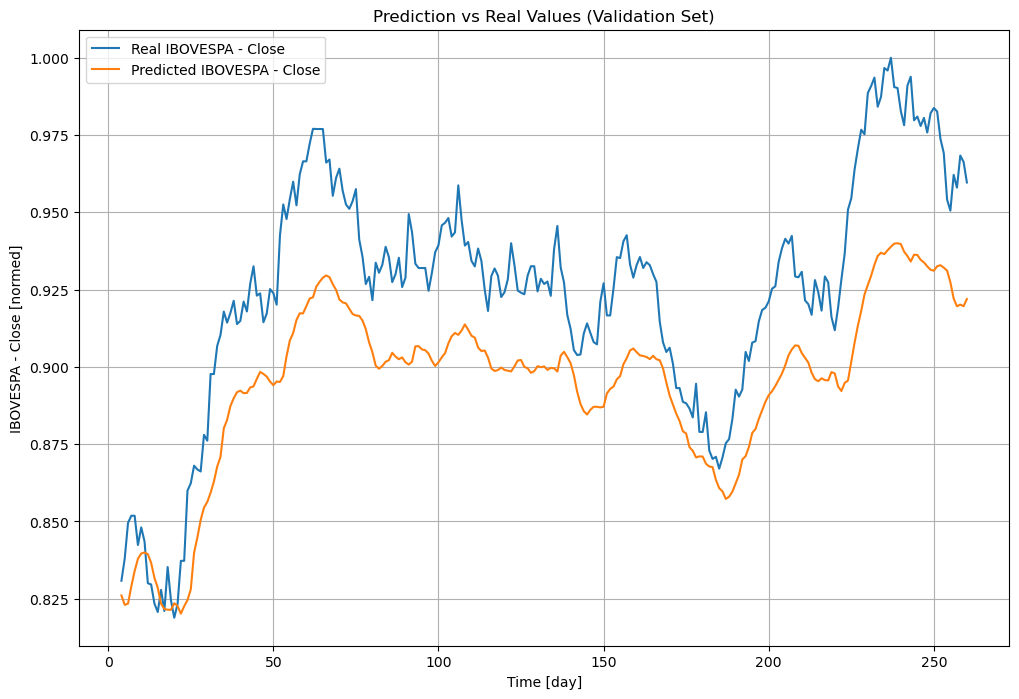

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 4)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


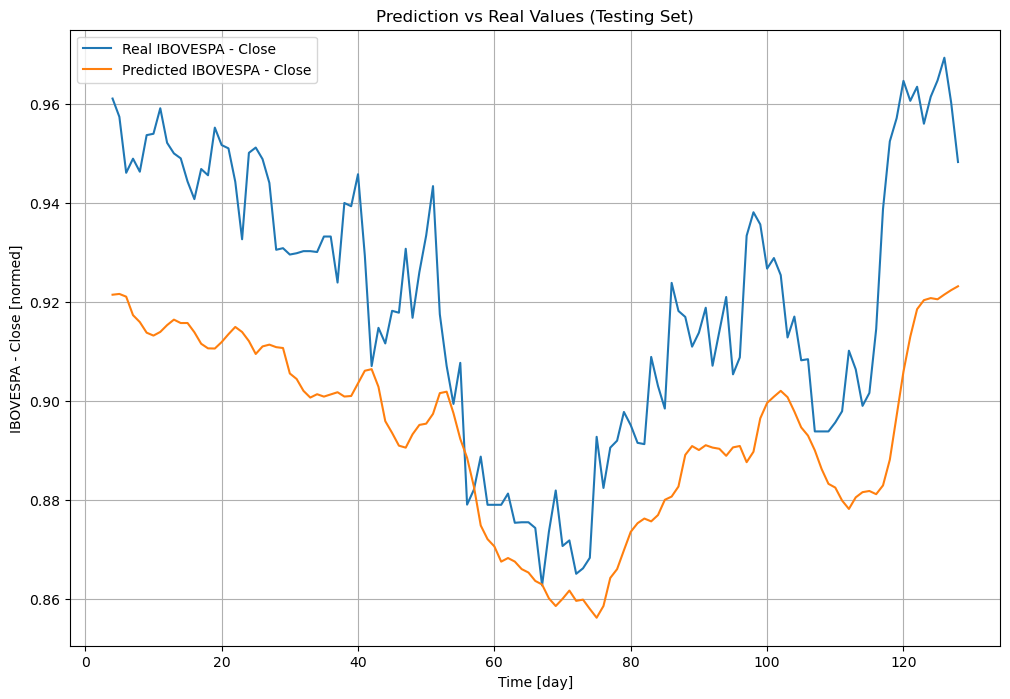

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

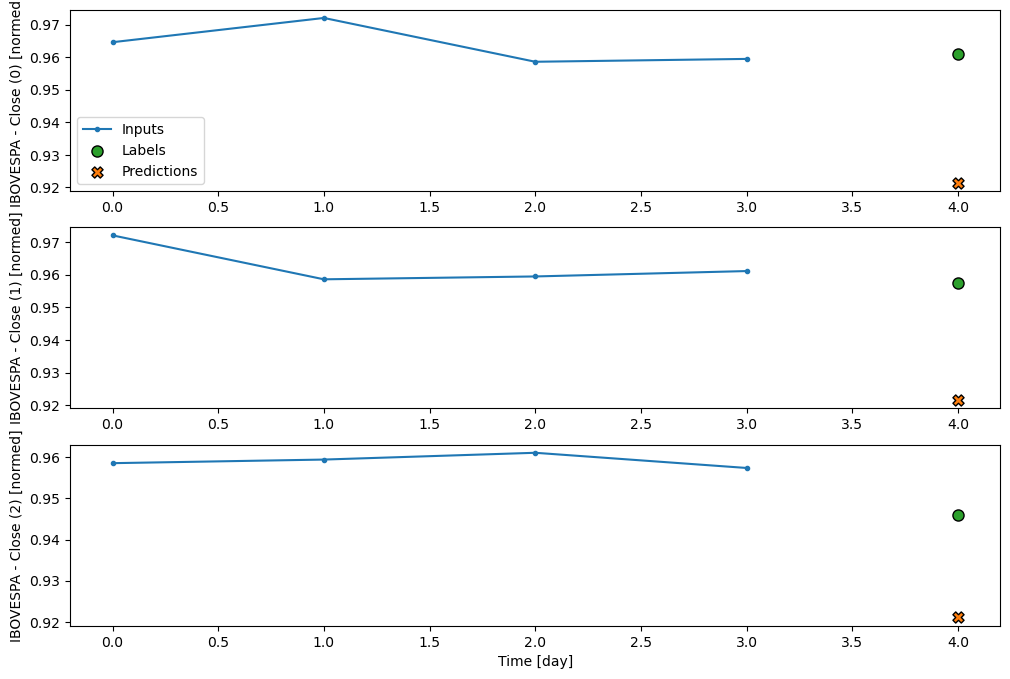

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:35s:191ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[[0.92144877, 0.92144877, 0.92144877, ..., 0.92144877,
         0.92144877, 0.92144877]],

       [[0.9216074 , 0.9216074 , 0.9216074 , ..., 0.9216074 ,
         0.9216074 , 0.9216074 ]],

       [[0.92105466, 0.92105466, 0.92105466, ..., 0.92105466,
         0.92105466, 0.92105466]],

       ...,

       [[0.921486  , 0.921486  , 0.921486  , ..., 0.921486  ,
         0.921486  , 0.921486  ]],

       [[0.92237794, 0.92237794, 0.92237794, ..., 0.92237794,
         0.92237794, 0.92237794]],

       [[0.92315745, 0.92315745, 0.92315745, ..., 0.92315745,
         0.92315745, 0.92315745]]], shape=(125, 1, 10), dtype=float32)

In [53]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')